In [4]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("gen_data/gen2/units_df.csv")
df.head()

,id,id_property,beds_basic,backyard,unit_bedroom_equipment,kitchen,unit_bathroom_equipment,room_buliding,unit_equipment,unit_living_equipment,...,in_cable_tv,un_view_river,breakfast,description_structure_frontname,description_structure_short,description_structure_long,un_view_park,minibar,meal_room_only,mosquito_net
0,24588,10043,4,0.449021,1.076279,2.243948,0.106548,-1.014682,-0.270266,-0.484396,...,-0.046537,-0.02325,-0.052044,-0.061612,-0.057027,-0.052044,-0.032889,-0.02325,-0.032889,-0.040291
1,24589,10043,4,0.449021,1.076279,0.275252,0.949890,-1.014682,-0.270266,-0.484396,...,-0.046537,-0.02325,-0.052044,-0.061612,-0.057027,-0.052044,-0.032889,-0.02325,-0.032889,-0.040291
2,24590,10043,4,0.449021,1.076279,0.871971,-0.727768,1.971703,-0.270266,1.912237,...,-0.046537,-0.02325,-0.052044,-0.061612,-0.057027,-0.052044,-0.032889,-0.02325,-0.032889,-0.040291
3,24593,10046,4,0.449021,0.052836,-0.047857,-0.727768,-1.014682,-0.270266,1.559785,...,-0.046537,-0.02325,-0.052044,-0.061612,-0.057027,-0.052044,-0.032889,-0.02325,-0.032889,-0.040291
4,24594,9098,4,0.449021,1.738705,0.079925,0.106548,1.971703,-0.270266,2.056771,...,-0.046537,-0.02325,-0.052044,-0.061612,-0.057027,-0.052044,-0.032889,-0.02325,-0.032889,-0.040291


## Analiza korelacija

<AxesSubplot:>

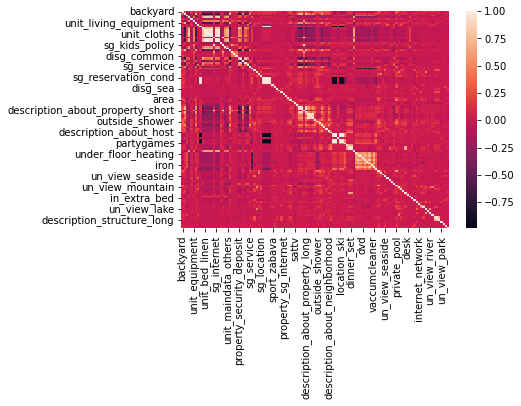

In [14]:
df_vals = df.iloc[:,3:]
corelation = df_vals.corr()
sns.heatmap(corelation,annot=False)


In [50]:
corlist = []
column_cor = corelation.columns
for i in range(119):
    for j in range(119):
        if i!=j:
            if corelation.iloc[i,j]>=0.98:

                corlist.append(column_cor[i])
                corlist.append(column_cor[j])
print(set(corlist))
un_list = list(set(corlist))

{'special_agroturism', 'sg_kids_policy', 'in_boat_included', 'location_ski', 'entertainment', 'children', 'description_about_property_short', 'health', 'sg_house_rules', 'unit_towels', 'sg_parking', 'unit_bed_linen'}


<AxesSubplot:>

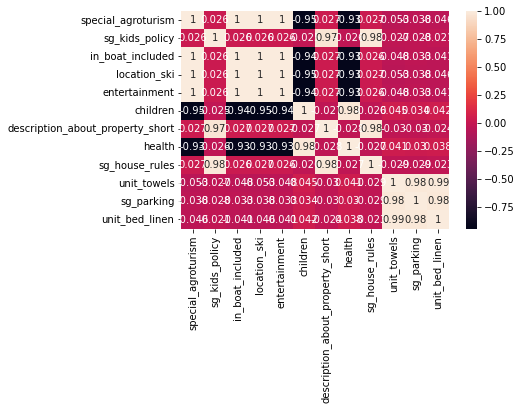

In [51]:
df_test = df.loc[:,un_list]
corelation2 = df_test.corr()
sns.heatmap(corelation2,annot=True)

In [91]:
def dfs_corelation(cor_matrix, cor_score,minmax= 1):
    column_cor = cor_matrix.columns
    ls1=[]
    ls2=[]
    ls3=[]
    for i in range(119):
        for j in range(119):
            if (i!=j) & (i<j):
                if minmax ==1:
                    if corelation.iloc[i,j]>=cor_score:

                        ls1.append(column_cor[i])
                        ls2.append(column_cor[j])
                        ls3.append(corelation.iloc[i,j])
                else:
                    if corelation.iloc[i,j]<=cor_score:

                        ls1.append(column_cor[i])
                        ls2.append(column_cor[j])
                        ls3.append(corelation.iloc[i,j])

    cors = pd.DataFrame({"fac01":ls1,"fac02":ls2,"cor":ls3})
         
    return cors

In [94]:
# arg minmax 1 za vece, 0 za manje
dfs_corelation(corelation,-0.99,0)

,fac01,fac02,cor
0,property_equipment,entertainment,-0.990962
1,property_equipment,in_boat_included,-0.990962


<AxesSubplot:>

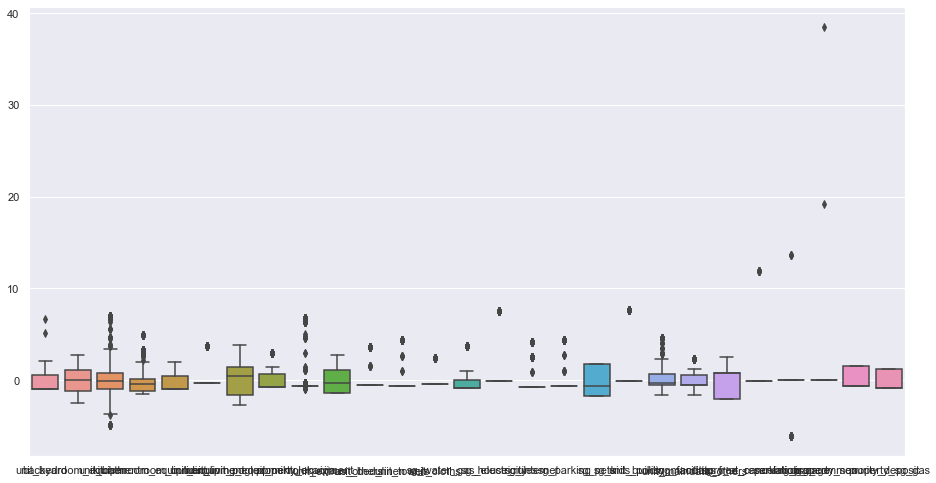

In [100]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.boxplot(data=df.iloc[:,3:30])

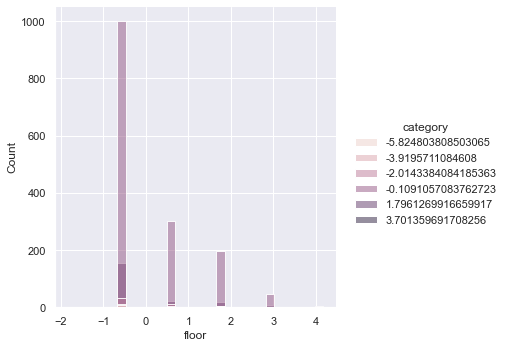

In [116]:
sns.displot(df.loc[:,["area","category","floor"]],x="floor",hue="category")

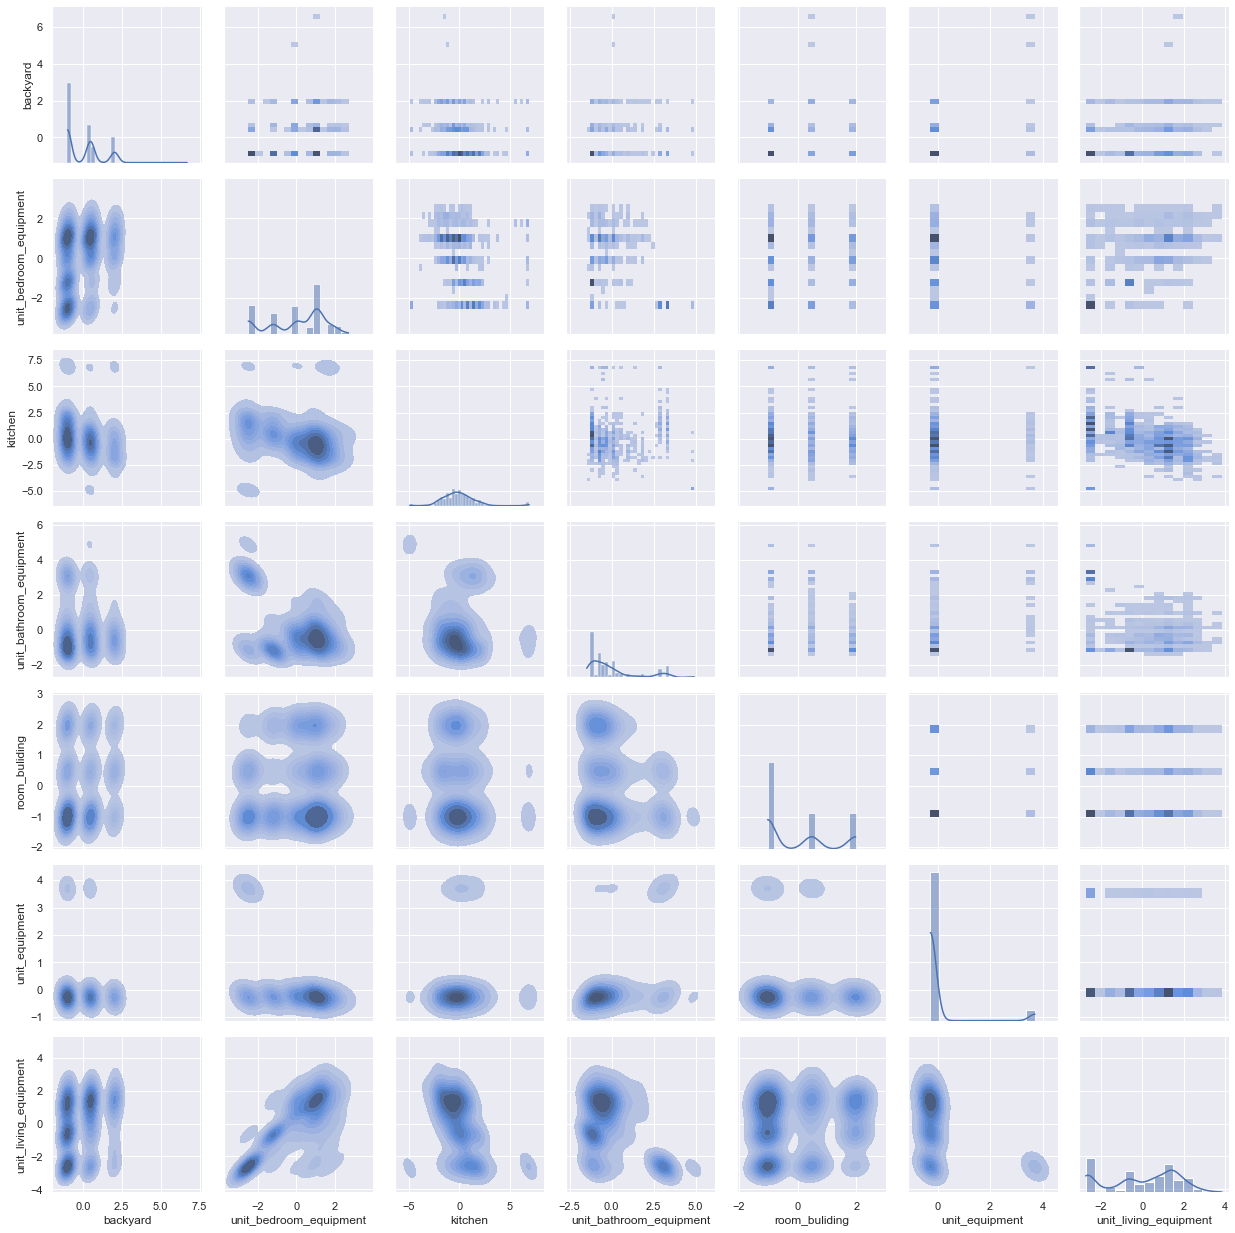

In [117]:
g = sns.PairGrid(df.iloc[:,3:10])
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)